In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

In [2]:
# Part B (2): Write python code to read in the test data and parse it into python data structures
df = pd.read_csv('Oregon_Hwy26 Crash_Data_for_2019 - Crashes on Hwy 26 during 2019.csv')
df.head()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,...,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Part B (3): Validate the first one of Existence Assertions: 45% of the records have a 'Participant ID' attribute
participant_Id = df['Participant ID'].count()
total_lines_in_csv = df['Crash ID'].count()
# print(total_lines_in_csv)
# print(participant_Id)
print((participant_Id / total_lines_in_csv)*100)

44.39576487769259


In [4]:
# Part B (3): Validate the second one of Existence Assertions: 80% of the records have a 'Vehicle ID' attribute
vehicle_Id = df['Vehicle ID'].count()
total_lines_in_csv = df['Crash ID'].count()
print((vehicle_Id / total_lines_in_csv)*100)

81.4530850675429


In [5]:
# Part B (3): Doing the Iterate part: Validate the third one of Existence Assertions: Every record has a 'Record Type' attribute
record_type_count = df['Record Type'].count()
crash_id_count = df['Crash ID'].count()
if record_type_count == crash_id_count:
    print('Every record has a Record Type attribute')
else:
    print("It is not the whole records have Record Type attribute")

Every record has a Record Type attribute


In [6]:
# Part B (3): Validate the first one of Limit Assertions: The Week Day Code data field should be between 1 and 7
weekday = df['Week Day Code']
result = set()
for i in range(len(weekday)):
    if math.isnan(weekday[i]) == False:
        result.add(int(weekday[i]))
print(result)

{1, 2, 3, 4, 5, 6, 7}


In [7]:
# Part B (3): Validate the second one of Limit Assertions: The County Code data field should be between 1 and 36.
county_code = df['County Code']
result = set()
for i in range(len(county_code)):
    if math.isnan(county_code[i]) == False:
        result.add(int(county_code[i]))
print(result)

{26, 3, 14}


In [8]:
# Part B (3): Doing the Iterate part: Validate the third one of Limit Assertions: The Collision Type data field should be between 0 and 9.
collision_type = df['Collision Type']
result = set(); valid = True
for i in range(len(collision_type)):
    if math.isnan(collision_type[i]) == False:
        result.add(int(collision_type[i]))
        if collision_type[i] < 0 or collision_type[i] > 9:
            valid = False
print(valid)

# The second method:
# checkSet = result | set(range(10))  # | Union meaning in the set()
# checkSet2 = checkSet - set(range(10))
# print(len(checkSet2) == 0)

True


In [9]:
# Part B (3): intra-record check assertions: Week Day Code - 1 = Crash Month + Crash Day + Crash Year
crash_month = df['Crash Month']
crash_day = df['Crash Day']
crash_year = df['Crash Year']
month_res = []
day_res = []
year_res = []
date_res = []

for i in range(len(crash_month)):
    if math.isnan(crash_month[i]) == False:
        month_res.append(int(crash_month[i]))
for i in range(len(crash_day)):
    if math.isnan(crash_day[i]) == False:
        day_res.append(int(crash_day[i]))
for i in range(len(crash_year)):
    if math.isnan(crash_year[i]) == False:
        year_res.append(int(crash_year[i]))

date_dict = {
    "Sun": 1,
    "Mon": 2,
    "Tue": 3,
    "Wed": 4,
    "Thu": 5,
    "Fri": 6,
    "Sat": 7
}

for i in range(len(month_res)):
    date = datetime.datetime(year_res[i], month_res[i], day_res[i])
    transform_date = date.strftime("%a")
    date_res.append(date_dict[transform_date])
print(date_res)


[5, 1, 6, 1, 2, 2, 7, 6, 6, 2, 7, 3, 6, 5, 5, 4, 2, 6, 6, 7, 7, 1, 7, 2, 3, 3, 2, 6, 7, 1, 7, 1, 3, 2, 7, 7, 6, 5, 7, 1, 7, 2, 7, 5, 4, 4, 7, 7, 3, 6, 4, 4, 3, 3, 3, 4, 4, 7, 3, 4, 4, 2, 4, 3, 6, 1, 3, 4, 1, 6, 6, 7, 2, 4, 5, 4, 7, 3, 7, 2, 4, 2, 6, 7, 5, 6, 1, 4, 4, 6, 1, 1, 4, 4, 7, 3, 3, 6, 5, 7, 1, 1, 2, 7, 7, 6, 4, 1, 5, 6, 6, 2, 4, 3, 2, 4, 1, 1, 7, 3, 1, 3, 5, 7, 7, 5, 3, 7, 4, 4, 3, 7, 1, 1, 2, 3, 6, 6, 7, 4, 6, 1, 7, 7, 7, 2, 1, 3, 5, 4, 4, 4, 1, 4, 5, 5, 6, 6, 6, 3, 5, 1, 6, 2, 3, 7, 2, 1, 4, 3, 4, 5, 7, 6, 6, 6, 1, 4, 5, 7, 1, 7, 6, 3, 4, 5, 6, 6, 7, 2, 3, 5, 4, 3, 4, 6, 6, 5, 1, 1, 7, 4, 2, 2, 6, 7, 5, 2, 7, 2, 5, 6, 1, 1, 2, 3, 3, 4, 6, 5, 7, 6, 4, 5, 1, 3, 5, 5, 6, 6, 6, 6, 6, 1, 1, 2, 2, 4, 5, 3, 3, 6, 2, 2, 4, 2, 2, 1, 6, 1, 2, 2, 2, 7, 6, 2, 7, 5, 3, 2, 2, 6, 5, 4, 5, 4, 5, 6, 5, 5, 3, 4, 7, 4, 1, 2, 7, 3, 4, 1, 4, 5, 7, 3, 2, 1, 3, 3, 3, 1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 3, 6, 4, 6, 7, 7, 1, 2, 1, 2, 4, 2, 3, 3, 3, 1, 6, 6, 6, 2, 6, 7, 3, 7, 7, 3, 4, 1, 2, 2, 5, 5, 1, 1, 

In [10]:
# Part B (3): intra-record check assertions: The Crash Severity is related to the Weather Condition
crash_severity = df['Crash Severity']
weather_condition = df['Weather Condition']
severity_res = []
weather_res = []

for i in range(len(crash_severity)):
    if math.isnan(crash_severity[i]) == False:
        severity_res.append(int(crash_severity[i]))

for i in range(len(weather_condition)):
    if math.isnan(weather_condition[i]) == False:
        weather_res.append(int(weather_condition[i]))

print(len(severity_res))
print(len(weather_res))
# The result is the same, then we can tell the crash severity is related to the weather condition

508
508


In [11]:
# Part B (3): Doing the Iterate part: Validate the third one of intra-record check Assertions: The City Section ID is related to the County Code.
city_section_id = df['City Section ID']
county_code = df['County Code']
county_set = set()
city_section_set = set()
city_name = []
county_name = []

for i in range(len(county_code)):
    if math.isnan(county_code[i]) == False:
        county_set.add(int(county_code[i]))

for i in range(len(city_section_id)):
    if math.isnan(city_section_id[i]) == False:
        city_section_set.add(int(city_section_id[i]))

city_dict = {
    0: 'Outside City',
    83: 'Greenhorn',
    245: 'Portland SE',
    247: 'Portland SW',
    185: 'Sandy',
    250: 'Portland Bridges'
}        

county_dict = {
    26: 'Multnomah',
    3: 'Clackamas',
    14: 'Hood River'
}

for val in city_section_set:
    city_name.append(city_dict[val])

for val in county_set:
    county_name.append(county_dict[val])

print(city_section_set)
print(city_name)
print(county_set)  
print(county_name)

{0, 83, 245, 247, 185, 250}
['Outside City', 'Greenhorn', 'Portland SE', 'Portland SW', 'Sandy', 'Portland Bridges']
{26, 3, 14}
['Multnomah', 'Clackamas', 'Hood River']


In [12]:
# Part B (3): inter-record check assertions: The Crash Hour at 14 should not be more than 10%.
crash_hour = df['Crash Hour']
crash_list = []
fourteen_count = 0
for i in range(len(crash_hour)):
    if math.isnan(crash_hour[i]) == False:
        crash_list.append(int(crash_hour[i]))
        if int(crash_hour[i]) == 14:
            fourteen_count += 1
print((fourteen_count / len(crash_list))*100)

6.692913385826772


In [13]:
# Part B (3): inter-record check assertions: The Urban Area Code is 57 should be more than 70%.
urban_area = df['Urban Area Code']
urban_area_code_list = []
fifteen_seven_count = 0
for i in range(len(urban_area)):
    if math.isnan(urban_area[i]) == False:
        urban_area_code_list.append(int(urban_area[i]))
        if int(urban_area[i]) == 57:
            fifteen_seven_count += 1

print((fifteen_seven_count / len(urban_area_code_list)) * 100)

71.65354330708661


In [14]:
# Part B (3): Doing the Iterate part: Validate the third one of inter-record check Assertions: The County Code is 26 should be more than 50%.
county_code = df['County Code']
county_code_list = []
twenty_six_count = 0

for i in range(len(county_code)):
    if math.isnan(county_code[i]) == False:
        county_code_list.append(int(county_code[i]))
        if int(county_code[i]) == 26:
            twenty_six_count += 1

print((twenty_six_count / len(county_code_list)) * 100)

68.7007874015748


In [15]:
# Part B (3): Summary assertions: Every Vehicle has a unique ID
vehicle_id = df['Vehicle ID']
vehicle_id_count = 0
vehicle_id_none_count = 0
for i in range(len(vehicle_id)):
    if math.isnan(vehicle_id[i]) == False:
        vehicle_id_count += 1
    else:
        vehicle_id_none_count += 1

if vehicle_id_count + vehicle_id_none_count == len(vehicle_id):
    print(True)
else:
    print(False)

# If the result is True, then we can tell every vehicle has a unique ID

True


In [16]:
# Part B (3): Summary assertions: Every Participant has a unique ID
participant_id = df['Participant ID']
participant_id_count = 0
participant_id_none_count = 0
for i in range(len(participant_id)):
    if math.isnan(participant_id[i]) == False:
        participant_id_count += 1
    else:
        participant_id_none_count += 1

if participant_id_count + participant_id_none_count == len(participant_id):
    print(True)
else:
    print(False)

True


In [17]:
# Part B (3): Doing the Iterate part: Validate the third one of summary Assertions: Not every crash has a unique crash serial number.
crash_id = df['Crash ID']
serial_num = df['Serial #']
crash_id_set = set()
serial_set = set()

for i in range(len(crash_id)):
    if math.isnan(crash_id[i]) == False:
        crash_id_set.add(crash_id[i])

for i in range(len(serial_num)):
    if math.isnan(serial_num[i]) == False:
        serial_set.add(serial_num[i])

if len(crash_id_set) != len(serial_set):
    print("Not every crash has a unique crash serial number.")
else:
    print("Every crash has a unique crash serial number")

Not every crash has a unique crash serial number.


In [18]:
# Part B (3): Referential integrity insertions: Every crash participant has a Vehicle ID of a known vehicle.
vehicle_id = df['Vehicle ID']
participant_id = df['Participant ID']
vehicle_set = set()
participant_set = set()

for i in range(len(vehicle_id)):
    if math.isnan(vehicle_id[i]) == False:
        vehicle_set.add(int(vehicle_id[i]))

for i in range(len(participant_id)):
    if math.isnan(participant_id[i]) == False:
        participant_set.add(int(participant_id[i]))

if len(participant_set) >= len(vehicle_set):
    print(True)
else:
    print(False)

# If True, then we can tell every crash participant has a Vehicle ID of a known vehicle. 
# For example, there are four people in a car and this car is happened a car accident with another car. 
# Then in logically, the number of participant is greater or equal than the number of crash car.

True


In [19]:
# Part B (3): Referential integrity insetions: Every crash vehicle has a Crash ID of a known crash.
crash_id = df['Crash ID']
vehicle_id = df['Vehicle ID']
crash_set = set()
vehicle_set = set()

for i in range(len(crash_id)):
    if math.isnan(crash_id[i]) == False:
        crash_set.add(int(crash_id[i]))

for i in range(len(vehicle_id)):
    if math.isnan(vehicle_id[i]) == False:
        vehicle_set.add(int(vehicle_id[i]))

if len(vehicle_set) >= len(crash_set):
    print(True)
else:
    print(False)

# If return True, then we can say every crash vehicle has a Crash ID of a known crash
# Think of a situation: only one car has a car crash, then need to use "=" symbol.

True


In [20]:
# Part B (3): Doing the Iterate part: Validate the third one of referential integrity insertions: Every crash has a Serial number of a known crash.
crash_id = df['Crash ID']
serial_num = df['Serial #']
crash_id_set = set()
serial_list = []

for i in range(len(crash_id)):
    if math.isnan(crash_id[i]) == False:
        crash_id_set.add(int(crash_id[i]))

for i in range(len(serial_num)):
    if math.isnan(serial_num[i]) == False:
        serial_list.append(int(serial_num[i]))

if len(crash_id_set) == len(serial_list):
    print("Every crash has a Serial number of a known crash.")
else:
    print("Not every crash has a Serial number of a known crash")

Every crash has a Serial number of a known crash.


no matter what the weather conditions are, crashes would happen.


Weather Condition
0.0      1
1.0    346
2.0     89
3.0     37
4.0     16
5.0     19
Name: Crash ID, dtype: int64


Text(0, 0.5, 'Crash Count')

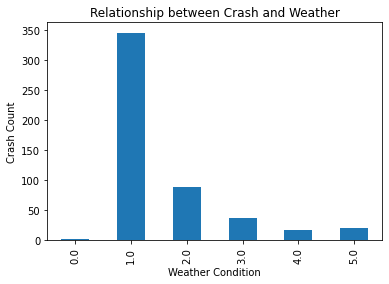

In [21]:
# Part B (3): statistical distribution assertion: No matter what the weather conditions are, crashes would happen.
weather_condition = df['Weather Condition']
crash_id = df['Crash ID']
weather_list = []
crash_set = set()

for i in range(len(weather_condition)):
    if math.isnan(weather_condition[i]) == False:
        weather_list.append(int(weather_condition[i]))

for i in range(len(crash_id)):
    if math.isnan(crash_id[i]) == False:
        crash_set.add(int(crash_id[i]))

if len(crash_set) == len(weather_list):
    print('no matter what the weather conditions are, crashes would happen.')
else:
    print('no matter what the weather conditions are, crashes would not happen.')

print('\n')
grouped_df = df.groupby('Weather Condition')['Crash ID'].count()
print(grouped_df)

df.groupby('Weather Condition')['Crash ID'].count().plot.bar()
plt.title('Relationship between Crash and Weather')
plt.ylabel('Crash Count')

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 99} 

Crash Hour
0.0     11
1.0      5
2.0      5
3.0      4
4.0      2
5.0      9
6.0      8
7.0     19
8.0     26
9.0     28
10.0    23
11.0    18
12.0    35
13.0    29
14.0    34
15.0    52
16.0    38
17.0    50
18.0    28
19.0    23
20.0    25
21.0    18
22.0     7
23.0     7
99.0     4
Name: Crash ID, dtype: int64


Text(0, 0.5, 'Crash Count')

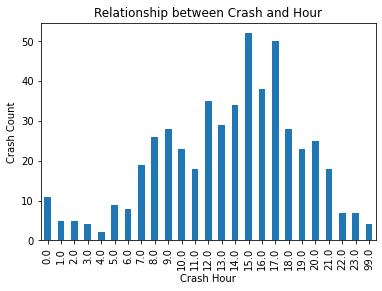

In [22]:
# Part B (3): statistical distribution assertion: Crashes can happen in the 24 hours every day.
crash_hour = df['Crash Hour']
crash_hour_set = set()

for i in range(len(crash_hour)):
    if math.isnan(crash_hour[i]) == False:
        crash_hour_set.add(int(crash_hour[i]))

print(crash_hour_set,'\n')

grouped_df = df.groupby('Crash Hour')['Crash ID'].count()
print(grouped_df)

df.groupby('Crash Hour')['Crash ID'].count().plot.bar()
plt.title('Relationship between Crash and Hour')
plt.ylabel('Crash Count')

No matter what the road surface conditions are, crashes would happen.

 Road Surface Condition
0.0      84
1.0     122
2.0       4
3.0       2
4.0      85
7.0       5
9.0       2
11.0      1
15.0      9
19.0      7
22.0      7
23.0      1
90.0      4
99.0    175
Name: Crash ID, dtype: int64


Text(0, 0.5, 'Crash Count')

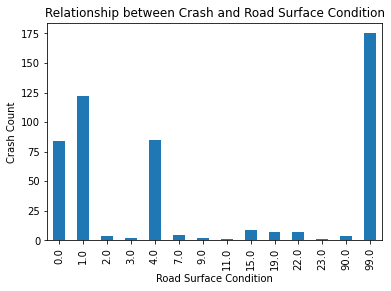

In [23]:
# Part B (3): Doing the Iterate part: Validate the third one of statistical distribution assertions: No matter what the road surface conditions are, crashes would happen.
road_surface_condition = df['Road Surface Condition']
crash_id = df['Crash ID']
crash_set = set()
road_surface_condition_list = []

for i in range(len(road_surface_condition)):
    if math.isnan(road_surface_condition[i]) == False:
        road_surface_condition_list.append(road_surface_condition[i])

for i in range(len(crash_id)):
    if math.isnan(crash_id[i]) == False:
        crash_set.add(crash_id[i])    

if len(road_surface_condition_list) == len(crash_set):
    print("No matter what the road surface conditions are, crashes would happen.")
else:
    print("No matter what the road surface conditions are, crashes would not happen.")

grouped_df = df.groupby('Road Surface Condition')['Crash ID'].count()
print('\n',grouped_df)

df.groupby('Road Surface Condition')['Crash ID'].count().plot.bar()
plt.title('Relationship between Crash and Road Surface Condition')
plt.ylabel('Crash Count')